In [9]:
#kütüphaneleri import edelim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression


In [10]:
#veri setini tanımlayalım
df = pd.read_csv("diabetes.csv")

#ilk beş satırı görüntüleyelim
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#sayısal verilerin temel istatistiksel değerlerine bakalım
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#kayıp verileri kontrol edelim
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

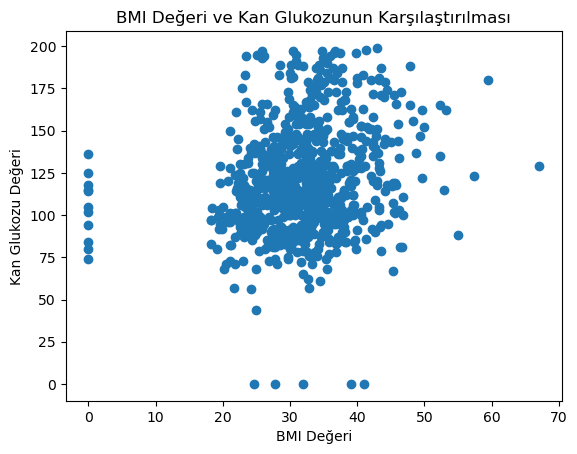

In [26]:
#matplotlib kütüphanesini kullanarak veri görselleştirmesi yapalım
#ilk olarak Kan Glukozu Seviyesi ile BMI değerini karşılaştıralım
glucose = df["Glucose"]
bmi = df["BMI"]

plt.scatter(bmi,glucose)
plt.xlabel("BMI Değeri")
plt.ylabel("Kan Glukozu Değeri")
plt.title("BMI Değeri ve Kan Glukozunun Karşılaştırılması")
plt.show()

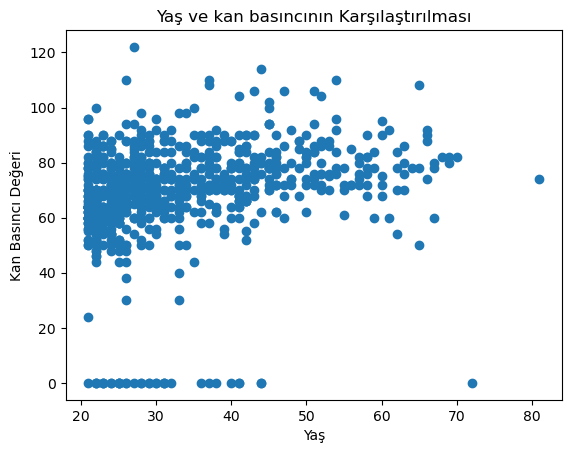

In [30]:
#Yaş ve Kan basıncı değerlerini karşılaştıralım
age = df["Age"]
blood_pressure = df["BloodPressure"]

plt.scatter(age,blood_pressure)
plt.xlabel("Yaş")
plt.ylabel("Kan Basıncı Değeri")
plt.title("Yaş ve kan basıncının Karşılaştırılması")
plt.show()

In [14]:
#veriyi train ve test olmak üzere ikiye ayıralım
X = df.drop("Outcome",axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#bir makine öğrenmesi algoritması seçip modeli eğitelim
#bir sınıflandırma algoritması olan logistik regresyonu kullanıyoruz
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
#tahmin algoritmasını oluşturalım
y_pred = model.predict(X_test)

In [17]:
#modeli geliştirelim
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ",confusion_mat)


Accuracy:  0.7467532467532467
Confusion Matrix :  [[78 21]
 [18 37]]


In [31]:
#şimdi ise diğer bir sınıflandırma algoritması olan Karar Ağacı Algoritmasını kullanalım
#öncelikle gerekli paketi import edelim
from sklearn.tree import DecisionTreeClassifier

#yeniden x ve y olarak ikiye bölelim
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
#karar ağacı algoritması oluşturalım
model2 = DecisionTreeClassifier()

#algoritmayı eğitelim
model2 = model2.fit(x_train,y_train)

#veri seti için tahminde bulunalım
y_pred = model2.predict(x_test)

In [35]:
#tekrar accuracy skoru hesaplayalım
#accuracy : sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır

from sklearn import metrics

print("Accuracy : ",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy :  67.53246753246754


In [37]:
#confusion matrix değerini hesaplayalım
#confusion matrix : bir sınıflandırma problemindeki tahmin sonuçlarının özetini gösterir
#yapılan hatalar hakkında da bilgi verir 

confusion_matrix(y_test,y_pred)

array([[74, 25],
       [25, 30]], dtype=int64)

In [38]:
#claffication report
#sınıflandırma problemi için bir performans ölçümü

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        99
           1       0.55      0.55      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [39]:
#kurmuş olduğumuz modelden verdiğimiz değeri tahmin etmesini isteyelim

model2.predict([[8,145,70,30,0,32.8,0.650,48]])

C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [40]:
model2.predict([[2,70,70,25,0,24,0.600,32]])

C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)